In [376]:
import pandas as pd
import numpy as np

In [377]:
hotel = pd.read_csv('hotel.csv')
hotel = pd.read_csv('hotel.csv')

In [378]:
# Display the first few rows of the dataframe
pd.set_option('display.max_columns', None)
hotel.head(5)

,LeadTime,ArrivalDate,ArrivalWeekNumber,StaysInWeekendNights,StaysInWeekNights,NumberOfAdult,NumberOfChildren,NumberOfBabies,BookingMeal,Country,MarketSegment,BookingDistributionChannel,RepeatedGuest,ReservedRoom,AssignedRoom,BookingChanges,DepositType,TravelAgent,BookingCompany,DaysInWaitingList,CustomerType,AverageDailyRate,BookingParking,TotalOfSpecialRequests,CheckoutDate
0,6,2015-July-1,27,0,2,1,0,0,HB,PRT,Offline TA/TO,TA/TO,0,A,A,0,No Deposit,6,NULL,0,Transient,0.00,0,0,2015-07-03
1,3,2015-July-2,27,0,3,1,0,0,HB,PRT,Groups,TA/TO,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,58.67,0,0,2015-07-05
2,43,2015-July-3,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,2015-07-05
3,43,2015-July-3,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,43.00,0,0,2015-07-05
4,43,2015-July-3,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,2015-07-05


In [379]:
# Display summary statistics
hotel.describe()


,LeadTime,ArrivalWeekNumber,StaysInWeekendNights,StaysInWeekNights,NumberOfAdult,NumberOfChildren,NumberOfBabies,RepeatedGuest,BookingChanges,DaysInWaitingList,AverageDailyRate,BookingParking,TotalOfSpecialRequests
count,30411.000000,30411.000000,30411.000000,30411.000000,30411.000000,30411.000000,30411.000000,30411.000000,30411.000000,30411.000000,30411.000000,30411.000000,30411.000000
mean,73.181579,31.472428,0.781757,2.079083,1.812371,0.092894,0.007596,0.033639,0.252409,3.224228,99.988053,0.046102,0.686659
std,82.242904,13.359593,0.861400,1.391060,0.533932,0.372456,0.114581,0.180301,0.691626,21.503967,37.975558,0.210335,0.800673
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,21.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.500000,0.000000,0.000000
50%,44.000000,34.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,1.000000
75%,108.000000,42.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,119.000000,0.000000,1.000000
max,429.000000,53.000000,16.000000,41.000000,4.000000,3.000000,10.000000,1.000000,21.000000,379.000000,451.500000,3.000000,5.000000


In [380]:
# check is there any missing value in dataframe
hotel.isnull().sum()

LeadTime                      0
ArrivalDate                   0
ArrivalWeekNumber             0
StaysInWeekendNights          0
StaysInWeekNights             0
NumberOfAdult                 0
NumberOfChildren              0
NumberOfBabies                0
BookingMeal                   0
Country                       2
MarketSegment                 0
BookingDistributionChannel    0
RepeatedGuest                 0
ReservedRoom                  0
AssignedRoom                  0
BookingChanges                0
DepositType                   0
TravelAgent                   0
BookingCompany                0
DaysInWaitingList             0
CustomerType                  0
AverageDailyRate              0
BookingParking                0
TotalOfSpecialRequests        0
CheckoutDate                  0
dtype: int64

In [381]:
len(hotel)

30411

In [382]:
hotel = hotel[hotel['AverageDailyRate'] > 0]
hotel = hotel[hotel['LeadTime'] <= 300]
hotel = hotel[hotel['NumberOfAdult'] > 0]
hotel = hotel[hotel['DaysInWaitingList'] <= 14]
hotel = hotel[hotel['StaysInWeekNights'] + hotel['StaysInWeekendNights'] > 0]



hotel = hotel.reset_index(drop=True)
len(hotel)




27840

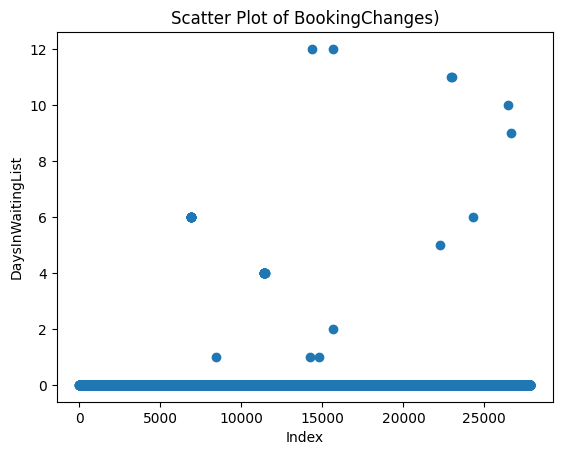

In [383]:
# Assuming df is your DataFrame
subset_df = hotel[['DaysInWaitingList']]

plt.scatter(subset_df.index, subset_df['DaysInWaitingList'])
plt.xlabel('Index')
plt.ylabel('DaysInWaitingList')
plt.title('Scatter Plot of BookingChanges)')
plt.show()

In [384]:
# Data transformation / Quality check
hotel['ArrivalDate'] = pd.to_datetime(hotel['ArrivalDate'])
hotel['CheckoutDate'] = pd.to_datetime(hotel['CheckoutDate'])

# Remove spaces from column AssignedRoom and ReservedRoom
hotel['AssignedRoom'] = hotel['AssignedRoom'].str.replace(' ','')
hotel['ReservedRoom'] = hotel['ReservedRoom'].str.replace(' ','')

hotel.head()


,LeadTime,ArrivalDate,ArrivalWeekNumber,StaysInWeekendNights,StaysInWeekNights,NumberOfAdult,NumberOfChildren,NumberOfBabies,BookingMeal,Country,MarketSegment,BookingDistributionChannel,RepeatedGuest,ReservedRoom,AssignedRoom,BookingChanges,DepositType,TravelAgent,BookingCompany,DaysInWaitingList,CustomerType,AverageDailyRate,BookingParking,TotalOfSpecialRequests,CheckoutDate
0,3,2015-07-02,27,0,3,1,0,0,HB,PRT,Groups,TA/TO,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,58.67,0,0,2015-07-05
1,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,2015-07-05
2,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,43.00,0,0,2015-07-05
3,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,2015-07-05
4,4,2015-07-03,27,0,2,1,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,63.00,0,0,2015-07-05


In [385]:
# Time frame

print('Min Arrival Date: ', min(hotel['ArrivalDate']))
print('Max Arrival Date: ', max(hotel['ArrivalDate']))

print('Min Checkout Date: ', min(hotel['CheckoutDate']))
print('Max Checkout Date: ', max(hotel['CheckoutDate']))

# Around 1.5 years


Min Arrival Date:  2015-07-01 00:00:00
Max Arrival Date:  2016-12-31 00:00:00
Min Checkout Date:  2015-07-03 00:00:00
Max Checkout Date:  2017-01-07 00:00:00


In [386]:
hotel.groupby(hotel['ArrivalDate'].dt.to_period("M")).size()

ArrivalDate
2015-07     421
2015-08    1174
2015-09    1825
2015-10    1743
2015-11     807
2015-12     865
2016-01     798
2016-02    1397
2016-03    1894
2016-04    1890
2016-05    1930
2016-06    2125
2016-07    1947
2016-08    1984
2016-09    2019
2016-10    1990
2016-11    1687
2016-12    1344
Freq: M, dtype: int64

In [387]:
hotel.groupby(hotel['CheckoutDate'].dt.to_period("M")).size()

CheckoutDate
2015-07     403
2015-08    1097
2015-09    1833
2015-10    1734
2015-11     875
2015-12     707
2016-01     924
2016-02    1328
2016-03    1822
2016-04    1881
2016-05    1958
2016-06    2100
2016-07    2011
2016-08    1925
2016-09    2030
2016-10    1965
2016-11    1801
2016-12    1236
2017-01     210
Freq: M, dtype: int64

In [388]:
hotel.groupby(hotel['AssignedRoom']).size()


AssignedRoom
A    17783
B     1155
C       67
D     6733
E      959
F      789
G      297
K       57
dtype: int64

In [389]:
hotel.groupby(hotel['AssignedRoom']).size()/hotel.shape[0] * 100

AssignedRoom
A    63.875718
B     4.148707
C     0.240661
D    24.184626
E     3.444684
F     2.834052
G     1.066810
K     0.204741
dtype: float64

In [390]:
result = hotel.groupby(hotel['AssignedRoom']).agg({'AssignedRoom' : 'count', 'AverageDailyRate' : 'sum'})
result['Room_Perc'] = (result['AssignedRoom'] / result['AssignedRoom'].sum()) * 100
result['Revenue_Perc'] = (result['AverageDailyRate'] / result['AverageDailyRate'].sum()) * 100
result

# Room A accounts for around 60% revenue, room D: 25%

,AssignedRoom,AverageDailyRate,Room_Perc,Revenue_Perc
AssignedRoom,,,,
A,17783,1691463.27,63.875718,58.701641
B,1155,113414.72,4.148707,3.936018
C,67,7450.05,0.240661,0.258551
D,6733,751326.31,24.184626,26.074517
E,959,124184.46,3.444684,4.309778
F,789,133449.36,2.834052,4.631313
G,297,53861.59,1.066810,1.869248
K,57,6308.46,0.204741,0.218933


In [391]:
hotel['AssignedRoom'] = hotel['AssignedRoom'].str.replace(' ','')
check = hotel[(hotel['AssignedRoom']== 'B') & (hotel['TotalOfSpecialRequests']==0)].sort_values(by=['CheckoutDate', 'ArrivalDate','StaysInWeekNights', 'StaysInWeekendNights','NumberOfAdult','NumberOfChildren']) [['ArrivalDate', 'AssignedRoom', 'TotalOfSpecialRequests', 'CheckoutDate', 'StaysInWeekendNights',	'StaysInWeekNights',	'NumberOfAdult',	'NumberOfChildren', 'AverageDailyRate']]
check.head(10)

# Average Daily Rate: revenue

,ArrivalDate,AssignedRoom,TotalOfSpecialRequests,CheckoutDate,StaysInWeekendNights,StaysInWeekNights,NumberOfAdult,NumberOfChildren,AverageDailyRate
126,2015-07-23,B,0,2015-07-24,0,1,2,0,90.00
137,2015-07-23,B,0,2015-07-24,0,1,2,0,90.00
4934,2015-07-30,B,0,2015-07-31,0,1,2,0,76.50
4936,2015-07-30,B,0,2015-08-03,1,3,1,0,68.00
222,2015-08-01,B,0,2015-08-04,2,1,2,0,89.75
321,2015-08-06,B,0,2015-08-07,0,1,2,0,81.00
5014,2015-08-08,B,0,2015-08-09,0,1,2,0,85.00
5015,2015-08-08,B,0,2015-08-09,0,1,2,0,85.00
454,2015-08-09,B,0,2015-08-11,2,0,2,3,153.00
418,2015-08-08,B,0,2015-08-12,2,2,2,0,62.00


**CUSTOMER ANALYSIS**

In [392]:
hotel.head()

,LeadTime,ArrivalDate,ArrivalWeekNumber,StaysInWeekendNights,StaysInWeekNights,NumberOfAdult,NumberOfChildren,NumberOfBabies,BookingMeal,Country,MarketSegment,BookingDistributionChannel,RepeatedGuest,ReservedRoom,AssignedRoom,BookingChanges,DepositType,TravelAgent,BookingCompany,DaysInWaitingList,CustomerType,AverageDailyRate,BookingParking,TotalOfSpecialRequests,CheckoutDate
0,3,2015-07-02,27,0,3,1,0,0,HB,PRT,Groups,TA/TO,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,58.67,0,0,2015-07-05
1,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,2015-07-05
2,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,43.00,0,0,2015-07-05
3,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,2015-07-05
4,4,2015-07-03,27,0,2,1,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,63.00,0,0,2015-07-05


In [393]:
customer = hotel.groupby(['CustomerType']).agg({'AssignedRoom' : 'count', 'AverageDailyRate' : 'sum'})
customer['Booking_perc'] = customer['AssignedRoom'] / result['AssignedRoom'].sum() * 100
customer['Rev_perc'] = customer['AverageDailyRate'] / result['AverageDailyRate'].sum() * 100
customer

,AssignedRoom,AverageDailyRate,Booking_perc,Rev_perc
CustomerType,,,,
Contract,1150,127345.16,4.130747,4.419469
Group,173,14379.77,0.621408,0.499045
Transient,18854,2034318.85,67.722701,70.600324
Transient-Party,7663,705414.44,27.525144,24.481161


In [394]:
hotel[hotel['CustomerType'] == 'Transient'] ['MarketSegment'].value_counts()

MarketSegment
Online TA        12192
Offline TA/TO     2762
Direct            2591
Corporate         1042
Groups             163
Aviation            85
Complementary       19
Name: count, dtype: int64

In [395]:
# Family
hotel['Is_family'] = (hotel['NumberOfChildren'] > 0) | (hotel['NumberOfBabies'] > 0)
hotel['Is_family'] = hotel['Is_family'].astype(int)
hotel.head()


,LeadTime,ArrivalDate,ArrivalWeekNumber,StaysInWeekendNights,StaysInWeekNights,NumberOfAdult,NumberOfChildren,NumberOfBabies,BookingMeal,Country,MarketSegment,BookingDistributionChannel,RepeatedGuest,ReservedRoom,AssignedRoom,BookingChanges,DepositType,TravelAgent,BookingCompany,DaysInWaitingList,CustomerType,AverageDailyRate,BookingParking,TotalOfSpecialRequests,CheckoutDate,Is_family
0,3,2015-07-02,27,0,3,1,0,0,HB,PRT,Groups,TA/TO,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,58.67,0,0,2015-07-05,0
1,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,2015-07-05,0
2,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,43.00,0,0,2015-07-05,0
3,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,2015-07-05,0
4,4,2015-07-03,27,0,2,1,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,63.00,0,0,2015-07-05,0


In [396]:
# Weekend & total of night
hotel['Is_weekend'] = (hotel['StaysInWeekendNights'] > 0).astype(int)
hotel['TotalNights'] = hotel['StaysInWeekendNights'] + hotel['StaysInWeekNights']
hotel.head()

,LeadTime,ArrivalDate,ArrivalWeekNumber,StaysInWeekendNights,StaysInWeekNights,NumberOfAdult,NumberOfChildren,NumberOfBabies,BookingMeal,Country,MarketSegment,BookingDistributionChannel,RepeatedGuest,ReservedRoom,AssignedRoom,BookingChanges,DepositType,TravelAgent,BookingCompany,DaysInWaitingList,CustomerType,AverageDailyRate,BookingParking,TotalOfSpecialRequests,CheckoutDate,Is_family,Is_weekend,TotalNights
0,3,2015-07-02,27,0,3,1,0,0,HB,PRT,Groups,TA/TO,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,58.67,0,0,2015-07-05,0,0,3
1,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,2015-07-05,0,0,2
2,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,43.00,0,0,2015-07-05,0,0,2
3,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,2015-07-05,0,0,2
4,4,2015-07-03,27,0,2,1,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,63.00,0,0,2015-07-05,0,0,2


In [397]:
hotel['RepeatedGuest'].value_counts()

RepeatedGuest
0    27086
1      754
Name: count, dtype: int64

In [398]:
hotel['TravelAgent'].value_counts()

TravelAgent
          9    11291
       NULL     3358
          7     1802
          1     1584
         14     1561
               ...  
        280        1
        285        1
        289        1
        265        1
        397        1
Name: count, Length: 163, dtype: int64

In [399]:
# Define a mapping dictionary
segment_mapping = {'Offline TA/TO': 0, 'Groups': 1, 'Online TA': 2, 'Direct': 3, 'Corporate': 4, 'Complementary': 5, 'Aviation': 6}

# Map the values and create a new column
hotel['MarketSegment_ID'] = hotel['MarketSegment'].map(segment_mapping)
hotel.head()

,LeadTime,ArrivalDate,ArrivalWeekNumber,StaysInWeekendNights,StaysInWeekNights,NumberOfAdult,NumberOfChildren,NumberOfBabies,BookingMeal,Country,MarketSegment,BookingDistributionChannel,RepeatedGuest,ReservedRoom,AssignedRoom,BookingChanges,DepositType,TravelAgent,BookingCompany,DaysInWaitingList,CustomerType,AverageDailyRate,BookingParking,TotalOfSpecialRequests,CheckoutDate,Is_family,Is_weekend,TotalNights,MarketSegment_ID
0,3,2015-07-02,27,0,3,1,0,0,HB,PRT,Groups,TA/TO,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,58.67,0,0,2015-07-05,0,0,3,1
1,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,2015-07-05,0,0,2,1
2,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,43.00,0,0,2015-07-05,0,0,2,1
3,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,2015-07-05,0,0,2,1
4,4,2015-07-03,27,0,2,1,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,63.00,0,0,2015-07-05,0,0,2,1


In [400]:
# Define a mapping for CustomerType
customer_type_mapping = {'Transient': 0, 'Transient-Party': 1, 'Contract': 2, 'Group': 3}

# Assuming your DataFrame is named 'df'
hotel['CustomerType_ID'] = hotel['CustomerType'].map(customer_type_mapping)
hotel.head()


,LeadTime,ArrivalDate,ArrivalWeekNumber,StaysInWeekendNights,StaysInWeekNights,NumberOfAdult,NumberOfChildren,NumberOfBabies,BookingMeal,Country,MarketSegment,BookingDistributionChannel,RepeatedGuest,ReservedRoom,AssignedRoom,BookingChanges,DepositType,TravelAgent,BookingCompany,DaysInWaitingList,CustomerType,AverageDailyRate,BookingParking,TotalOfSpecialRequests,CheckoutDate,Is_family,Is_weekend,TotalNights,MarketSegment_ID,CustomerType_ID
0,3,2015-07-02,27,0,3,1,0,0,HB,PRT,Groups,TA/TO,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,58.67,0,0,2015-07-05,0,0,3,1,1
1,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,2015-07-05,0,0,2,1,1
2,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,43.00,0,0,2015-07-05,0,0,2,1,1
3,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,2015-07-05,0,0,2,1,1
4,4,2015-07-03,27,0,2,1,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,63.00,0,0,2015-07-05,0,0,2,1,1


In [401]:
hotel['Revenue'] = hotel['AverageDailyRate'] * hotel['TotalNights']
hotel

,LeadTime,ArrivalDate,ArrivalWeekNumber,StaysInWeekendNights,StaysInWeekNights,NumberOfAdult,NumberOfChildren,NumberOfBabies,BookingMeal,Country,MarketSegment,BookingDistributionChannel,RepeatedGuest,ReservedRoom,AssignedRoom,BookingChanges,DepositType,TravelAgent,BookingCompany,DaysInWaitingList,CustomerType,AverageDailyRate,BookingParking,TotalOfSpecialRequests,CheckoutDate,Is_family,Is_weekend,TotalNights,MarketSegment_ID,CustomerType_ID,Revenue
0,3,2015-07-02,27,0,3,1,0,0,HB,PRT,Groups,TA/TO,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,58.67,0,0,2015-07-05,0,0,3,1,1,176.01
1,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,2015-07-05,0,0,2,1,1,172.00
2,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,1,No Deposit,1,NULL,0,Transient-Party,43.00,0,0,2015-07-05,0,0,2,1,1,86.00
3,43,2015-07-03,27,0,2,2,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,86.00,0,0,2015-07-05,0,0,2,1,1,172.00
4,4,2015-07-03,27,0,2,1,0,0,HB,PRT,Groups,TA/TO,0,A,A,0,No Deposit,1,NULL,0,Transient-Party,63.00,0,0,2015-07-05,0,0,2,1,1,126.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27835,7,2016-12-31,53,2,4,2,0,0,BB,FRA,Online TA,TA/TO,0,D,D,0,No Deposit,9,NULL,0,Transient,118.20,0,1,2017-01-06,0,1,6,2,0,709.20
27836,177,2016-12-30,53,2,5,3,1,0,BB,PRT,Direct,Direct,0,G,F,0,No Deposit,NULL,NULL,0,Transient,197.50,0,1,2017-01-06,1,1,7,3,0,1382.50
27837,173,2016-12-26,53,3,8,2,1,0,BB,BRA,Direct,Direct,0,E,F,4,No Deposit,NULL,NULL,0,Transient,117.82,0,1,2017-01-06,1,1,11,3,0,1296.02
27838,17,2016-12-30,53,2,5,2,0,0,SC,FRA,Online TA,TA/TO,0,A,A,0,No Deposit,9,NULL,0,Transient,90.34,0,1,2017-01-06,0,1,7,2,0,632.38


In [402]:
data_model = hotel[['NumberOfAdult', 'Is_family', 'Is_weekend', 'TotalNights','MarketSegment_ID', 'CustomerType_ID', 'Revenue', 'LeadTime', 'TotalOfSpecialRequests', 'AverageDailyRate']]

In [403]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns you want to scale
columns_to_scale = ['TotalNights', 'Revenue', 'LeadTime', 'AverageDailyRate', 'TotalOfSpecialRequests']

# Extract the selected columns
subset_data = data_model[columns_to_scale]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
scaled_data = scaler.fit_transform(subset_data)

# Create a DataFrame with the scaled values
scaled_data_df = pd.DataFrame(scaled_data, columns=columns_to_scale)





In [404]:
# Drop the original columns from data_model
data_model.drop(columns=['TotalNights', 'Revenue', 'LeadTime', 'AverageDailyRate', 'TotalOfSpecialRequests'], inplace=True)

# Concatenate the scaled columns to data_model
data_model = pd.concat([data_model, scaled_data_df], axis=1)
data_model

/var/folders/kt/jx5tc_t52y10ksv96cpk556m0000gn/T/ipykernel_72328/1359247706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model.drop(columns=['TotalNights', 'Revenue', 'LeadTime', 'AverageDailyRate', 'TotalOfSpecialRequests'], inplace=True)


,NumberOfAdult,Is_family,Is_weekend,MarketSegment_ID,CustomerType_ID,TotalNights,Revenue,LeadTime,AverageDailyRate,TotalOfSpecialRequests
0,1,0,0,1,1,0.060606,0.044771,0.010000,0.128013,0.0
1,2,0,0,1,1,0.030303,0.043745,0.143333,0.188679,0.0
2,2,0,0,1,1,0.030303,0.021745,0.143333,0.093230,0.0
3,2,0,0,1,1,0.030303,0.043745,0.143333,0.188679,0.0
4,1,0,0,1,1,0.030303,0.031977,0.013333,0.137625,0.0
...,...,...,...,...,...,...,...,...,...,...
27835,2,0,1,2,0,0.151515,0.181172,0.023333,0.260155,0.2
27836,3,1,1,3,0,0.181818,0.353415,0.590000,0.436182,0.2
27837,2,1,1,3,0,0.303030,0.331292,0.576667,0.259312,0.2
27838,2,0,1,2,0,0.181818,0.161520,0.056667,0.198313,0.2


In [405]:
data_model

,NumberOfAdult,Is_family,Is_weekend,MarketSegment_ID,CustomerType_ID,TotalNights,Revenue,LeadTime,AverageDailyRate,TotalOfSpecialRequests
0,1,0,0,1,1,0.060606,0.044771,0.010000,0.128013,0.0
1,2,0,0,1,1,0.030303,0.043745,0.143333,0.188679,0.0
2,2,0,0,1,1,0.030303,0.021745,0.143333,0.093230,0.0
3,2,0,0,1,1,0.030303,0.043745,0.143333,0.188679,0.0
4,1,0,0,1,1,0.030303,0.031977,0.013333,0.137625,0.0
...,...,...,...,...,...,...,...,...,...,...
27835,2,0,1,2,0,0.151515,0.181172,0.023333,0.260155,0.2
27836,3,1,1,3,0,0.181818,0.353415,0.590000,0.436182,0.2
27837,2,1,1,3,0,0.303030,0.331292,0.576667,0.259312,0.2
27838,2,0,1,2,0,0.181818,0.161520,0.056667,0.198313,0.2


/Users/tanphan/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tanphan/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tanphan/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tanphan/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of

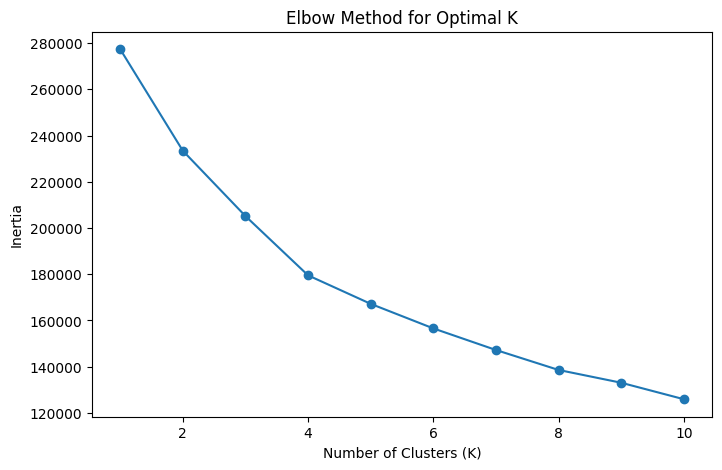

In [406]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'data_model' is your DataFrame
data = data_model[['NumberOfAdult', 'Is_family', 'Is_weekend', 'TotalNights', 'MarketSegment_ID', 'CustomerType_ID', 'Revenue', 'LeadTime', 'TotalOfSpecialRequests', 'AverageDailyRate']]

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Optional: Apply PCA for dimensionality reduction
# Choose the number of components based on the explained variance ratio
pca = PCA(n_components=0.95)  # Retain 95% of the variance
data_pca = pca.fit_transform(data_scaled)

# Use the Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca if 'data_pca' in locals() else data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [407]:
# Choose the optimal K based on the Elbow Method
optimal_k = 4  # Update with the optimal number of clusters

# Fit the K-means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_pca if 'data_pca' in locals() else data_scaled)

# Add the cluster labels to the original DataFrame
data_model['Cluster'] = clusters


/Users/tanphan/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


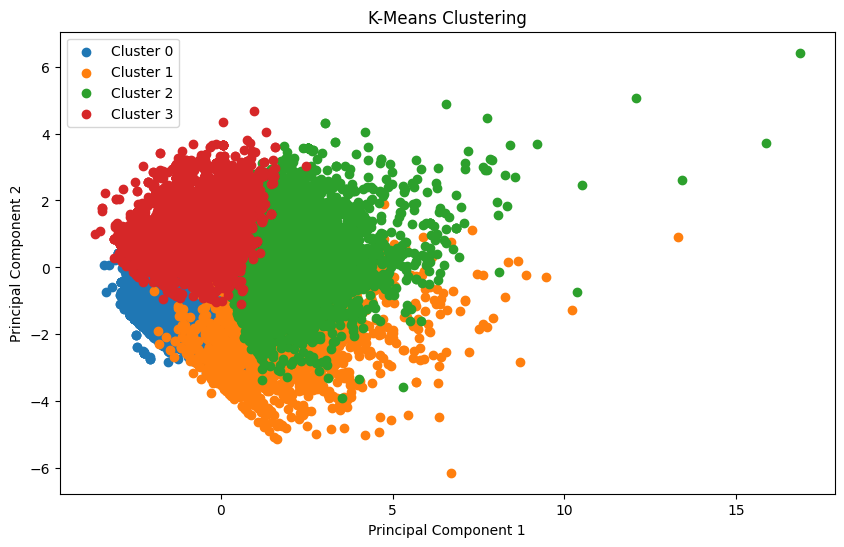

In [408]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_points = features_pca[data_model['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [409]:
hotel['Cluster'] = data_model['Cluster']
hotel.to_csv('output_file.csv', index=False)


In [410]:
hotel['Cluster'].value_counts()

Cluster
3    8857
0    8830
2    8131
1    2022
Name: count, dtype: int64